# Netflix Data Analysis

Let's create an advanced Python data analysis notebook. 

The dataset contains information about Netflix titles, with 8807 entries and 12 columns. Here's a quick summary of the columns:

- show_id: Unique identifier for each show.
- Type: Indicates if the title is a "Movie" or "TV Show".
- Title: Title of the show or movie.
- Director: Name(s) of the director(s), if available.
- Cast: Main cast members.
- Country: Country where the show/movie was produced.
- Date_added: Date when the title was added to Netflix.
- Release_year: Release year of the title.
- Rating: Content rating (e.g., PG, TV-MA).
- Duration: Length of the movie or number of seasons for TV shows.
- Listed_in: Categories or genres.
- Description: Brief description of the title.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sklearn package 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px

In [3]:
# File path
file_path = '/Users/inesdimassi/Documents/Data/Netflix/netflix_titles.csv'
# Read the file using Polars
df= pd.read_csv(file_path)

In [5]:
# Display first few rows
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [7]:
# Data Exploration
# Check for null values
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [9]:
# Basic statistics
print(df.describe(include='all'))

       show_id   type                 title       director  \
count     8807   8807                  8807           6173   
unique    8807      2                  8807           4528   
top         s1  Movie  Dick Johnson Is Dead  Rajiv Chilaka   
freq         1   6131                     1             19   
mean       NaN    NaN                   NaN            NaN   
std        NaN    NaN                   NaN            NaN   
min        NaN    NaN                   NaN            NaN   
25%        NaN    NaN                   NaN            NaN   
50%        NaN    NaN                   NaN            NaN   
75%        NaN    NaN                   NaN            NaN   
max        NaN    NaN                   NaN            NaN   

                      cast        country       date_added  release_year  \
count                 7982           7976             8797   8807.000000   
unique                7692            748             1767           NaN   
top     David Attenborough 

/var/folders/j7/vstms8g97ms_34xlkps7kx8c0000gn/T/ipykernel_2591/483214988.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='viridis')


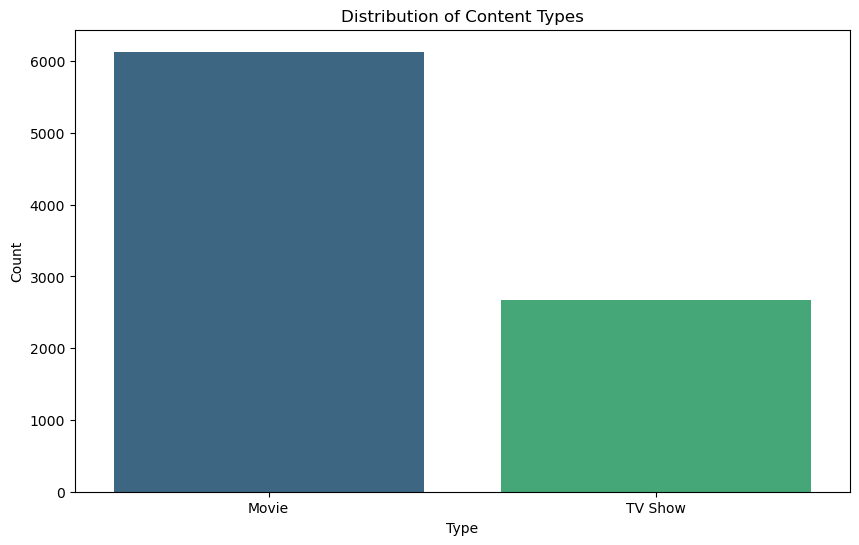

In [11]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', palette='viridis')
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

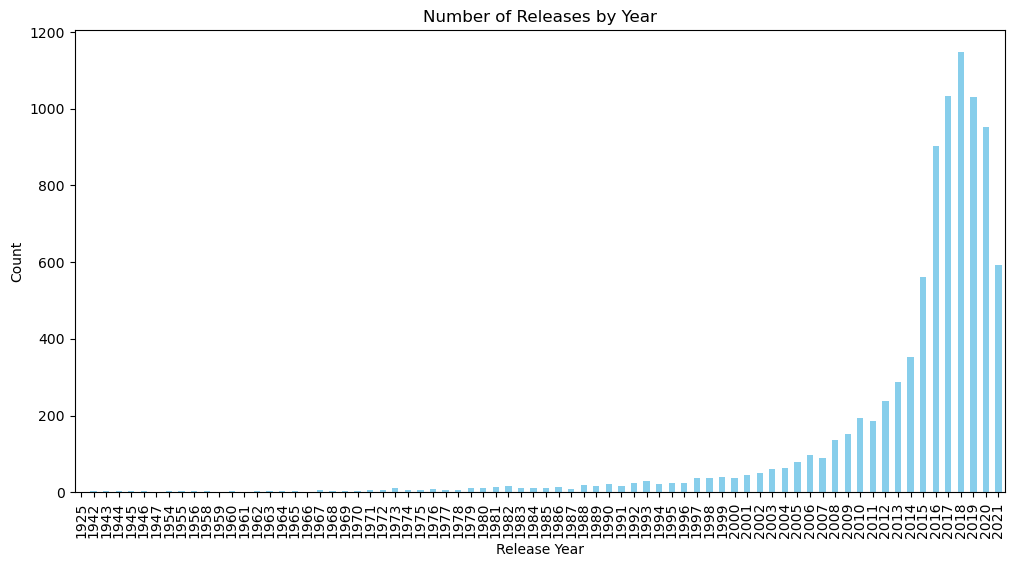

In [13]:
# Trend of releases over time
plt.figure(figsize=(12, 6))
df['release_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Releases by Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

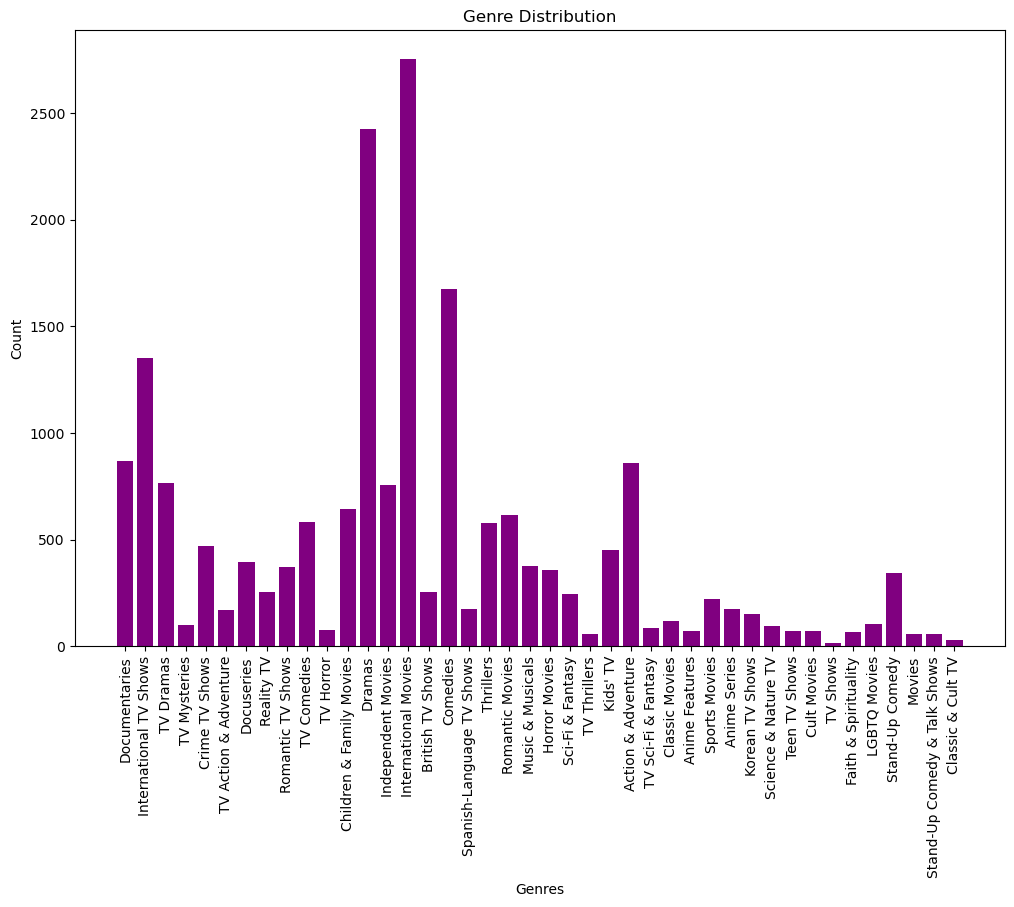

In [15]:
# Genre distribution
plt.figure(figsize=(12, 8))
from collections import Counter
genres = df['listed_in'].str.split(', ').sum()
genre_counts = Counter(genres)
plt.bar(genre_counts.keys(), genre_counts.values(), color='purple')
plt.xticks(rotation=90)
plt.title('Genre Distribution')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()

/var/folders/j7/vstms8g97ms_34xlkps7kx8c0000gn/T/ipykernel_2591/1222812432.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='magma')


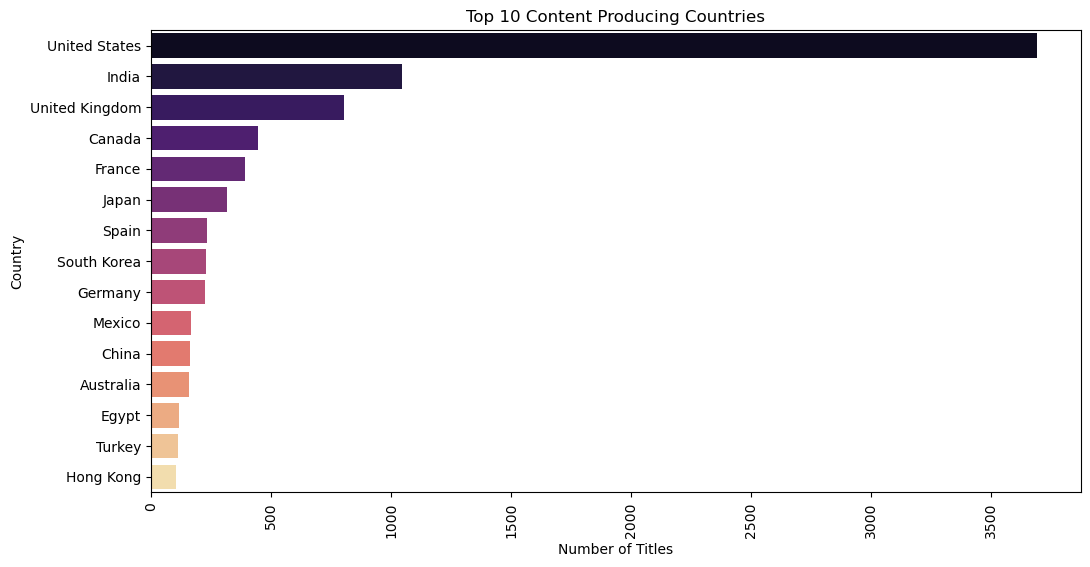

In [17]:
# Content Production by Country
plt.figure(figsize=(12, 6))

country = df['country'].dropna().str.split(', ').sum()
country_counts = pd.Series(country).value_counts().head(15)
plt.title('Top 10 Directors')
#.value_counts().head(10)
sns.barplot(x=country_counts.values, y=country_counts.index, palette='magma')
plt.xticks(rotation=90)
plt.title('Top 10 Content Producing Countries')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


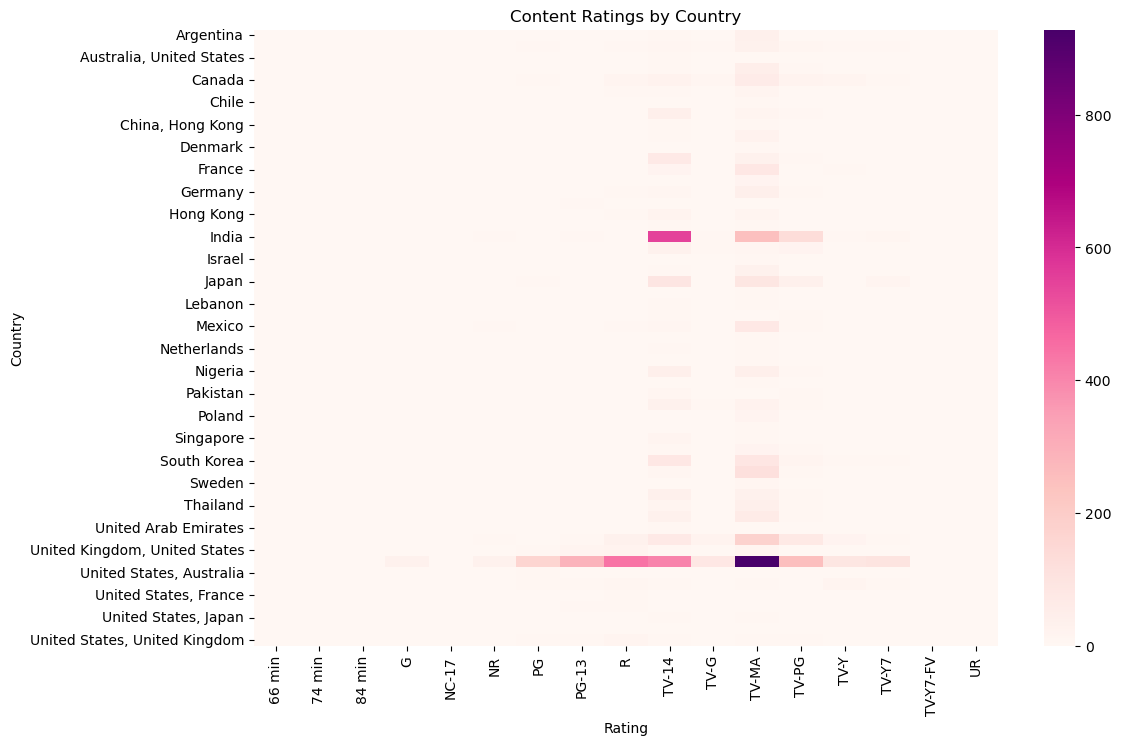

In [19]:
# Content rating by country
rating_by_country = df.groupby(['country', 'rating']).size().unstack().fillna(0)
rating_by_country = rating_by_country[rating_by_country.sum(axis=1) > 10]  # Filter out countries with low data
plt.figure(figsize=(12, 8))
sns.heatmap(rating_by_country, cmap='RdPu', annot=False)
plt.title('Content Ratings by Country')
plt.xlabel('Rating')
plt.ylabel('Country')
plt.show()

In [21]:
# Advanced Analysis: Clustering by Genres
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [23]:
# Vectorize genres
vectorizer = CountVectorizer()
descr_matrix = vectorizer.fit_transform(df['description'].dropna())

/var/folders/j7/vstms8g97ms_34xlkps7kx8c0000gn/T/ipykernel_2591/3333550705.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_counts.values, y=director_counts.index, palette='magma')


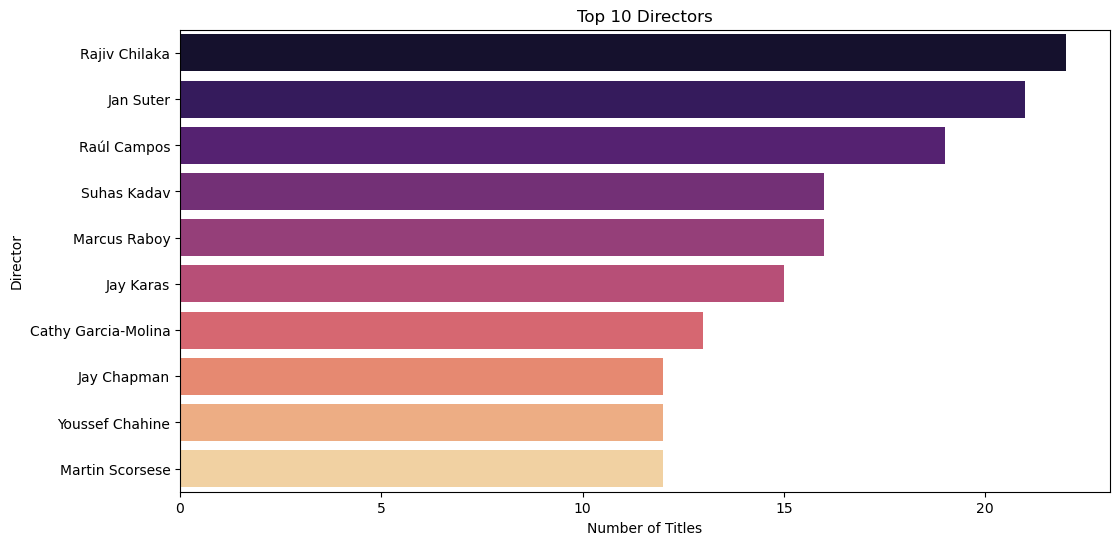

In [25]:
# Top Directors
plt.figure(figsize=(12, 6))
directors = df['director'].dropna().str.split(', ').sum()
director_counts = pd.Series(directors).value_counts().head(10)
sns.barplot(x=director_counts.values, y=director_counts.index, palette='magma')
plt.title('Top 10 Directors')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

/var/folders/j7/vstms8g97ms_34xlkps7kx8c0000gn/T/ipykernel_2591/3586561139.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cast_counts.values, y=cast_counts.index, palette='cividis')


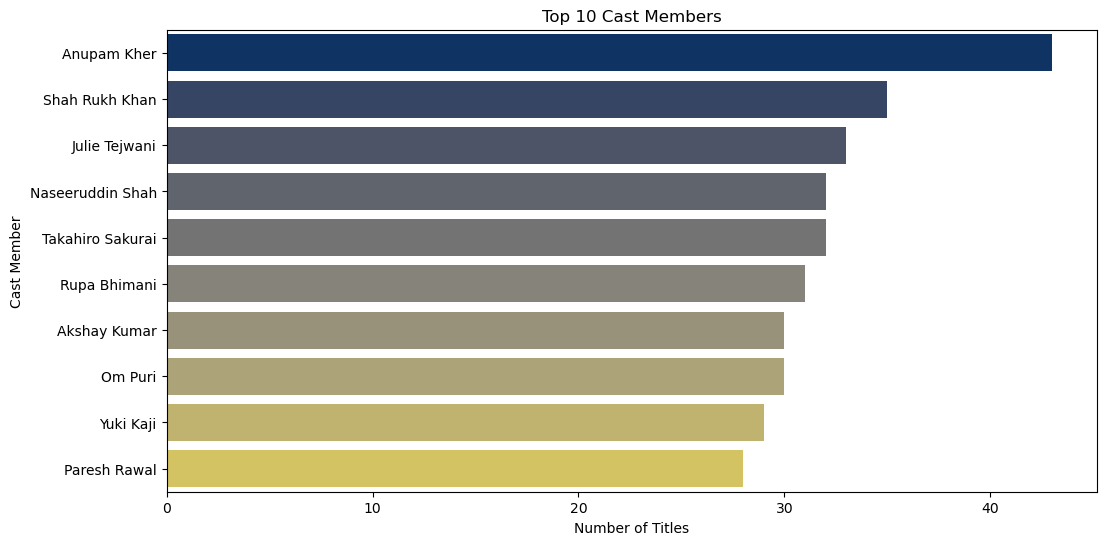

In [27]:
# Top Cast Members
plt.figure(figsize=(12, 6))
cast = df['cast'].dropna().str.split(', ').sum()
cast_counts = pd.Series(cast).value_counts().head(10)
sns.barplot(x=cast_counts.values, y=cast_counts.index, palette='cividis')
plt.title('Top 10 Cast Members')
plt.xlabel('Number of Titles')
plt.ylabel('Cast Member')
plt.show()

/var/folders/j7/vstms8g97ms_34xlkps7kx8c0000gn/T/ipykernel_2591/2570900179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_minutes'] = movies['duration'].str.replace(' min', '').astype(float)


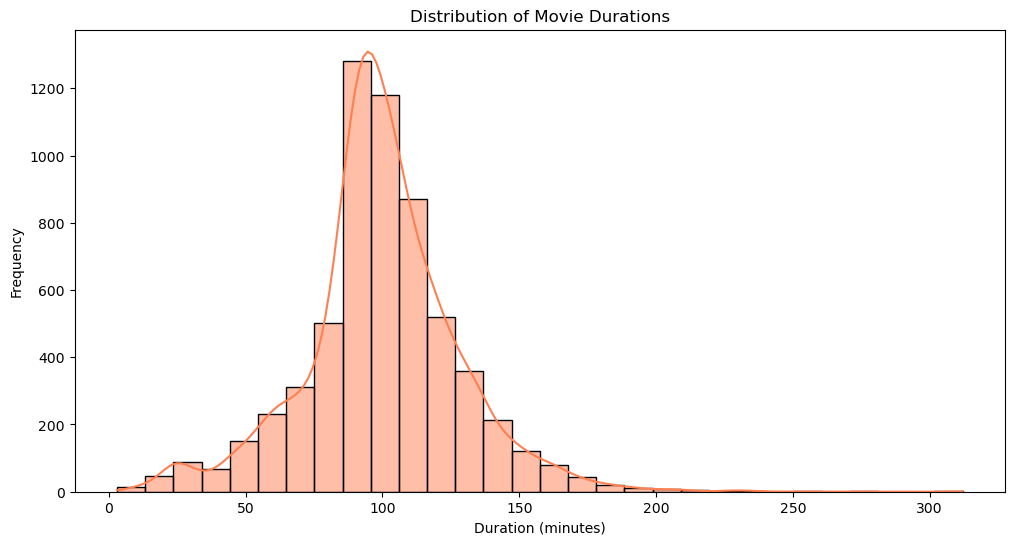

In [29]:
# Movie Duration Analysis
movies = df[df['type'] == 'Movie']
movies['duration_minutes'] = movies['duration'].str.replace(' min', '').astype(float)
plt.figure(figsize=(12, 6))
sns.histplot(movies['duration_minutes'], bins=30, kde=True, color='coral')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

/var/folders/j7/vstms8g97ms_34xlkps7kx8c0000gn/T/ipykernel_2591/1008688017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['num_seasons'] = tv_shows['duration'].str.replace(' Season', '').str.replace('s', '').astype(float)


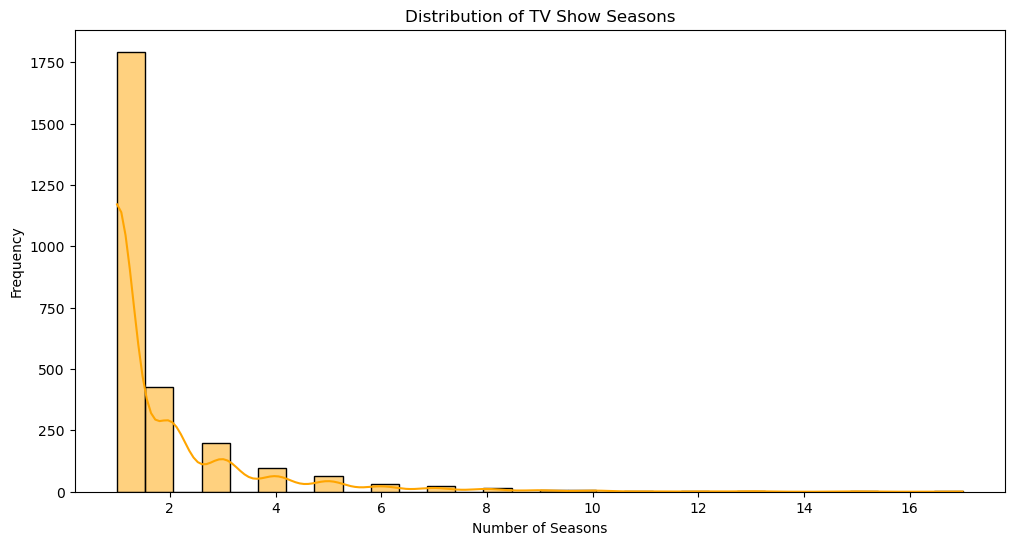

In [31]:
# TV Show Seasons Analysis
tv_shows = df[df['type'] == 'TV Show']
tv_shows['num_seasons'] = tv_shows['duration'].str.replace(' Season', '').str.replace('s', '').astype(float)
plt.figure(figsize=(12, 6))
sns.histplot(tv_shows['num_seasons'], bins=30, kde=True, color='orange')
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x600 with 0 Axes>

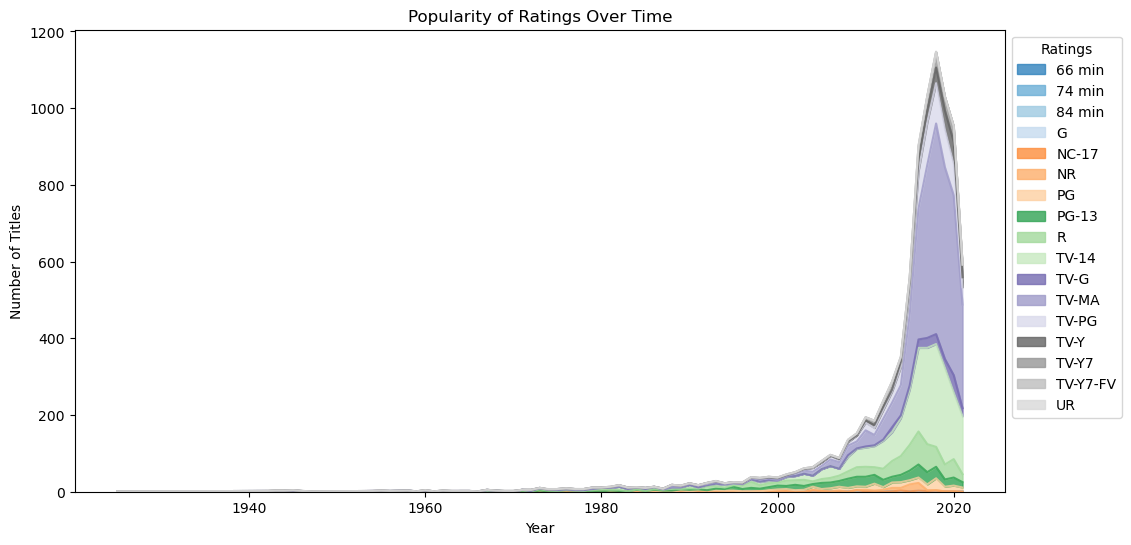

In [33]:
# Yearly Rating Trends
plt.figure(figsize=(12, 6))
ratings_over_time = df.groupby(['release_year', 'rating']).size().unstack(fill_value=0)
ratings_over_time.plot.area(figsize=(12, 6), cmap='tab20c', alpha=0.8)
plt.title('Popularity of Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(title='Ratings', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [37]:
# Apply KMeans clustering
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(descr_matrix)
df['descr_cluster'] = kmeans.labels_

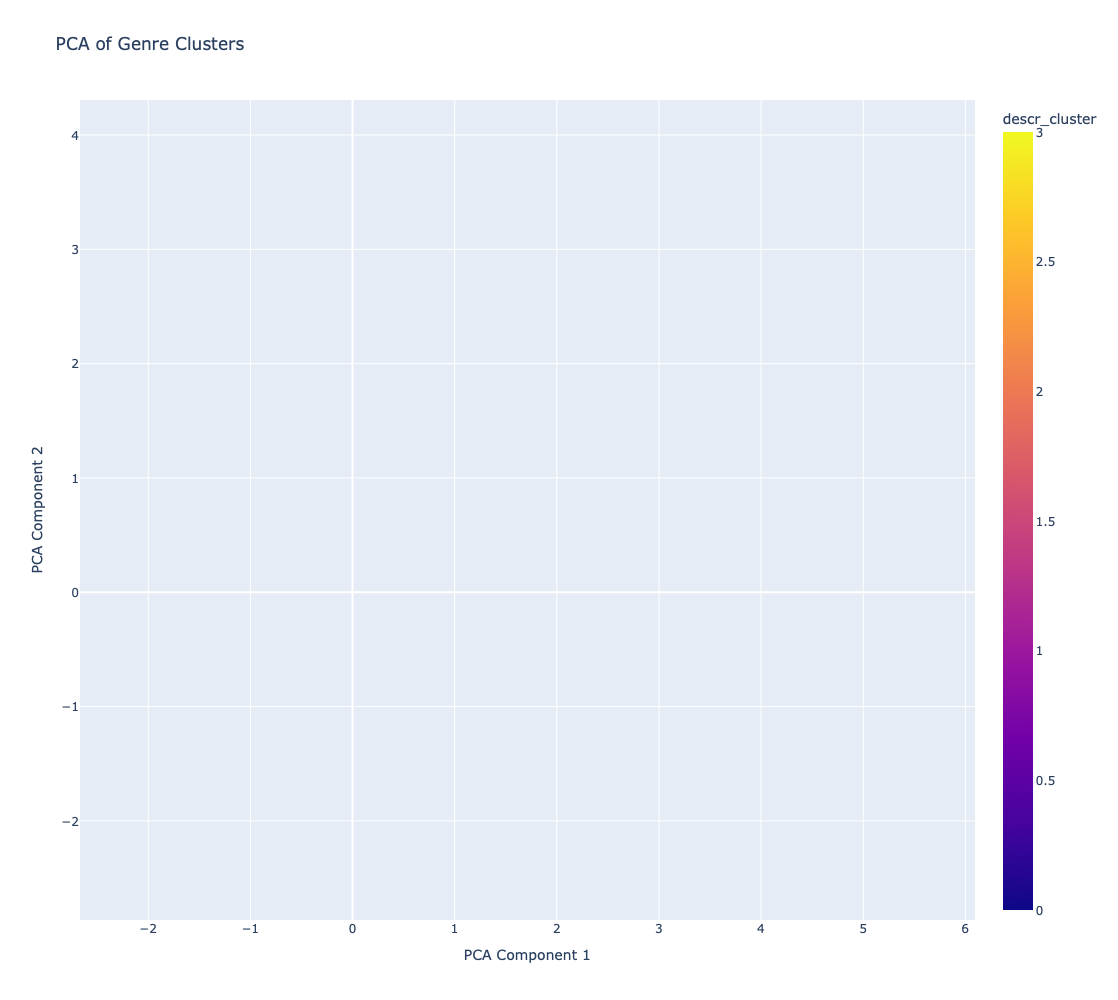

In [39]:
# PCA and t-SNE for Genre Clusters
# Dimensionality reduction with PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(descr_matrix.toarray())
df['pca_x'] = reduced_data[:, 0]
df['pca_y'] = reduced_data[:, 1]

# Interactive PCA plot with Plotly
fig = px.scatter(
    df,
    x='pca_x',
    y='pca_y',
    color='descr_cluster',
     width=1000, height=1000,
    hover_data=['title'],
    title='PCA of Genre Clusters',
    labels={'pca_x': 'PCA Component 1', 'pca_y': 'PCA Component 2'}
)
fig.update_traces(marker=dict(size=10, opacity=0.7), selector=dict(mode='markers'))
fig.show()

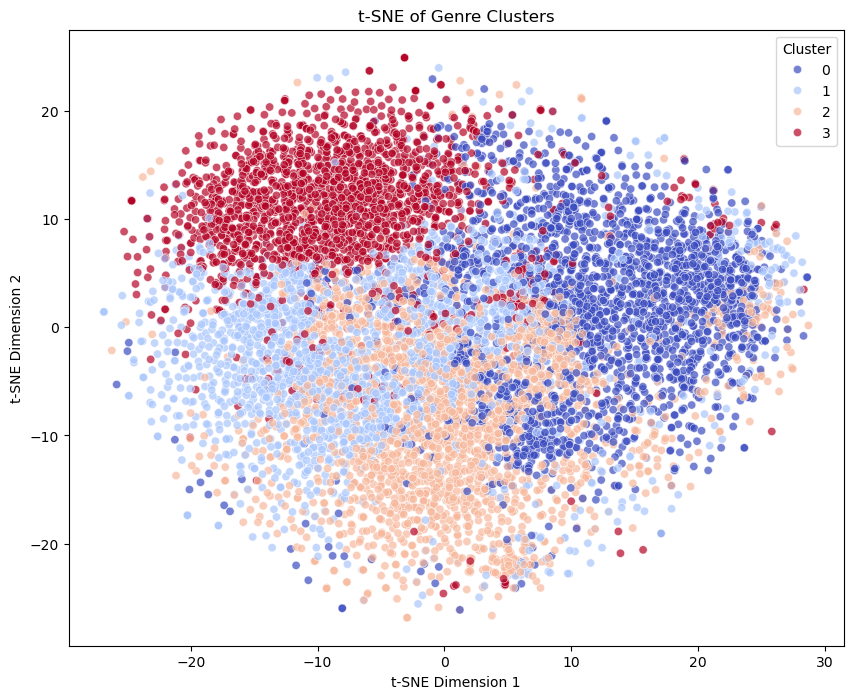

In [41]:
# t-SNE for more nuanced clustering
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(descr_matrix.toarray())
df['tsne_x'] = tsne_results[:, 0]
df['tsne_y'] = tsne_results[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_x', y='tsne_y', hue='descr_cluster', data=df, palette='coolwarm', alpha=0.7)
plt.title('t-SNE of Genre Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Cluster')
plt.show()

## Movie recommendation

In [43]:
rc=pd.DataFrame(df)

In [45]:
# Fill missing values for analysis
rc['director'] = rc['director'].fillna('')
rc['cast'] = rc['cast'].fillna('')
rc['country'] = rc['country'].fillna('')
rc['rating'] = rc['rating'].fillna('')
rc['listed_in'] = rc['listed_in'].fillna('')
rc['description'] = rc['description'].fillna('')

In [49]:
# Combine relevant text features for recommendations
rc['combined_features'] = rc['director'] + ' ' + rc['cast'] + ' ' + rc['country'] + ' ' + rc['rating'] + ' ' + rc['listed_in'] + ' ' + rc['description']


In [51]:
rc['combined_features']

0       Kirsten Johnson  United States PG-13 Documenta...
1        Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...
2       Julien Leclercq Sami Bouajila, Tracy Gotoas, S...
3          TV-MA Docuseries, Reality TV Feuds, flirtat...
4        Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...
                              ...                        
8802    David Fincher Mark Ruffalo, Jake Gyllenhaal, R...
8803       TV-Y7 Kids' TV, Korean TV Shows, TV Comedie...
8804    Ruben Fleischer Jesse Eisenberg, Woody Harrels...
8805    Peter Hewitt Tim Allen, Courteney Cox, Chevy C...
8806    Mozez Singh Vicky Kaushal, Sarah-Jane Dias, Ra...
Name: combined_features, Length: 8807, dtype: object

In [53]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
feature_matrix = vectorizer.fit_transform(rc['combined_features'])

In [55]:
# Cosine Similarity Matrix
cosine_sim = cosine_similarity(feature_matrix, feature_matrix)

In [57]:
# Function to get movie recommendations
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie matching the title
    idx = rc[rc['title'] == title].index[0]

    # Get pairwise similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Return the titles of the top 10 movies
    movie_indices = [i[0] for i in sim_scores]
    return rc['title'].iloc[movie_indices]

In [59]:
# Example: Get recommendations for a specific title
example_title = 'Friends'  # Replace with an actual title from the dataset
try:
    recommendations = get_recommendations(example_title)
    print(f"Recommendations for '{example_title}':\n", recommendations)
except IndexError:
    print(f"Title '{example_title}' not found in dataset.")


Recommendations for 'Friends':
 5090                                             Episodes
1929                                      Man with a Plan
4096                                            Studio 54
6549                                           Dad's Army
7301                                           Life Story
3369                                      BoJack Horseman
5056    Jerry Seinfeld: I'm Telling You for the Last Time
3009                                    A Fall from Grace
4964                                    Trailer Park Boys
4368             Mystery Science Theater 3000: The Return
Name: title, dtype: object


In [61]:
rc.to_csv('netflix_titlesp.csv')

In [63]:
rc

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water                    
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans                    
4         s5  TV Show           Kota Factory                    
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb                    
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                        United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...                  
3                                                                        
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                                     
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  descr_cluster  \
0     As her father nears the end of his life, filmm...              3   
1     After crossing paths at a party, a Cape Town t...              0   
2     To protect his family from a powerful drug lor...              0   
3     Feuds, flirtations and toilet talk go down amo...              3   
4     In a city of coaching centers known to train I...              1   
...                                                 ...            ...   
8802  A political cartoonist, a crime reporter and a...              1   
8803  While living alone in a spooky town, a young g...              1   
8804  Looking to survive in a world taken over by zo...              1   
8805  Dragged from civilian life, a former superhero...              1   
8806  A scrappy but poor boy worms his way into a ty...              1   

         pca_x  